In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import wnfilter as wf
import sembrick as sb
import retrivedata as rd

import sepdata as sd

import api 

data_dir = './CsvData'

### Get accel data

In [2]:
accel_file_name = data_dir + '/MSensors/pi-pier9-bridge-accel-0-4-a-z-2-readings.csv'

sensor_name = 'accel_temp_sensor'
accel_tss = rd.readAccelFromLocal(accel_file_name, sensor_name)


### Create time interval list of meaningful data using acc mask

In [3]:
# Create tss data list from tss bdata (Use filter to get meaningful data) 
meaningful_time_interval_lst = sd.createMeaningfulTimeIntervalLstFromAccel(accel_tss, filter_type = 'threshold_121')

### Get strain gauge data

In [4]:
strain_file_name = data_dir + '/pi-pier9-bridge-strain-0-right-s-0-readings.csv'
strain_sensor_name = 'strain_temp_sensor'
strain_tss = rd.readStrainFromLocal(strain_file_name, strain_sensor_name)

### Get meaningful data on strain gauge using time interval list from above

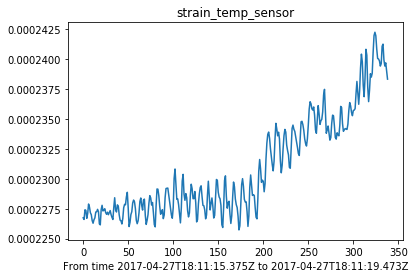

---------------------------------------------------



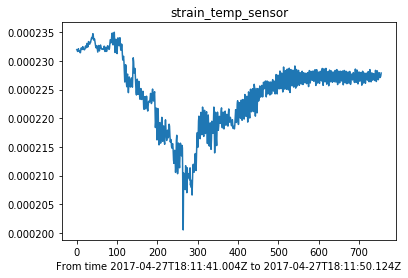

---------------------------------------------------



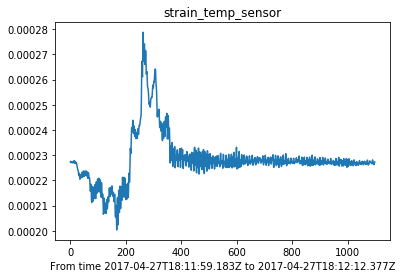

---------------------------------------------------



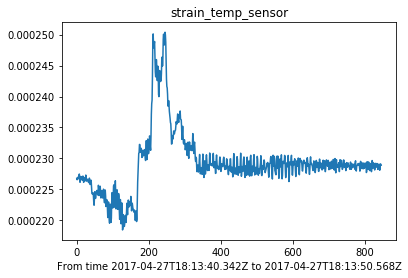

---------------------------------------------------



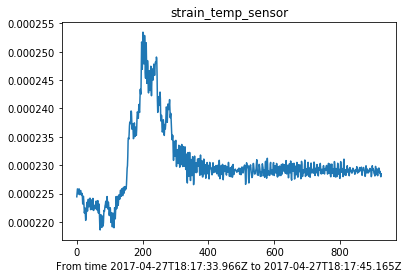

---------------------------------------------------



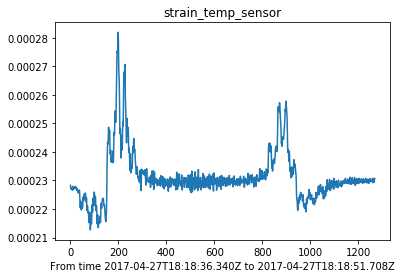

---------------------------------------------------



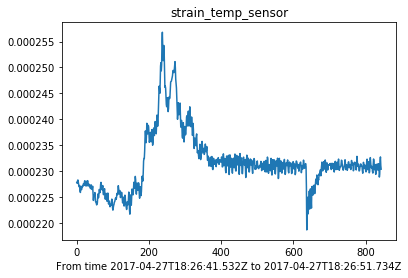

---------------------------------------------------



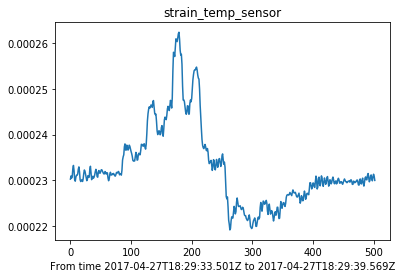

---------------------------------------------------



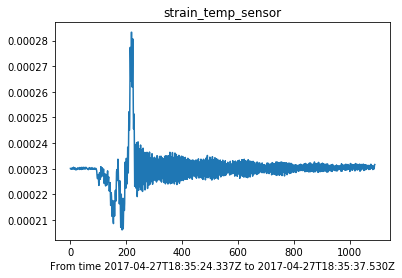

---------------------------------------------------



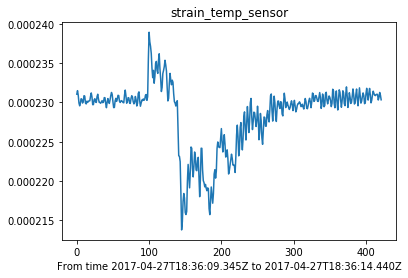

---------------------------------------------------



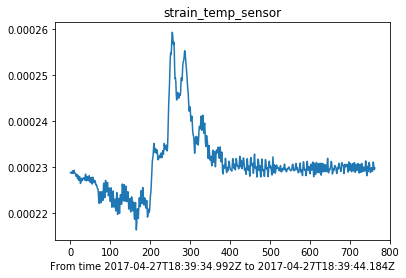

---------------------------------------------------



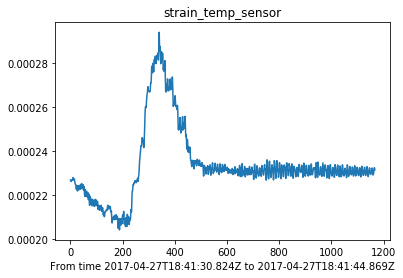

---------------------------------------------------



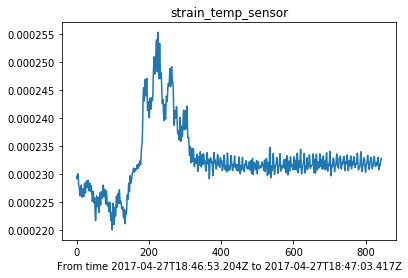

---------------------------------------------------



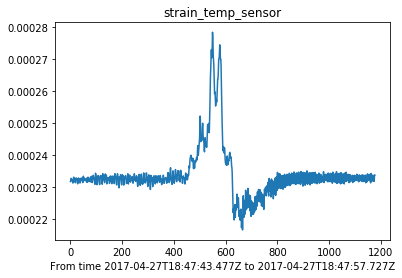

---------------------------------------------------



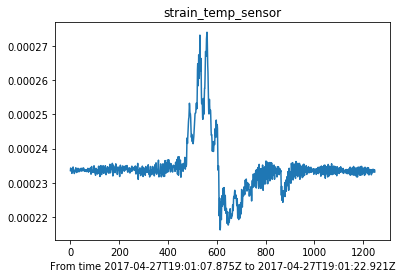

---------------------------------------------------



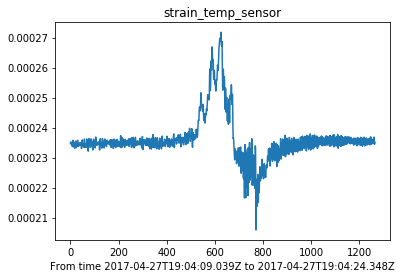

---------------------------------------------------



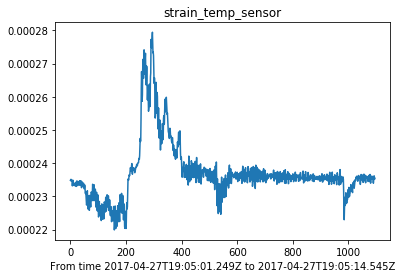

---------------------------------------------------



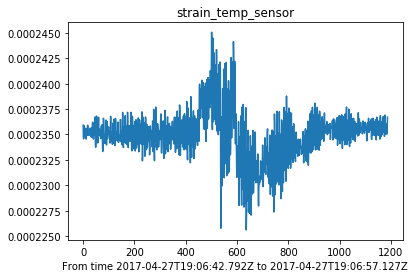

---------------------------------------------------



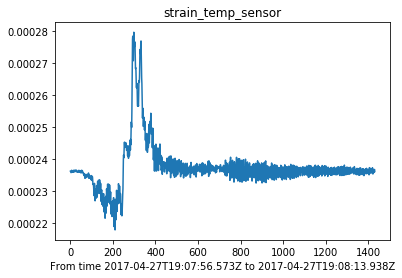

---------------------------------------------------



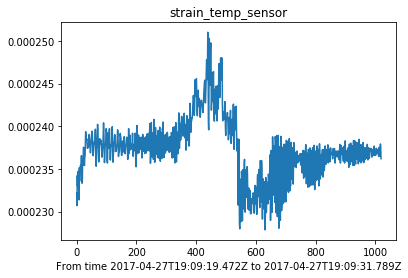

---------------------------------------------------



In [5]:
strain_tss.addMaskByTimeIntervalLst(meaningful_time_interval_lst,'occ_strain')
strain_tss_lst = strain_tss.applyMaskByName('occ_strain')

for i in range(20):
    strain_tss_lst[i].plotY()
    #strain_tss_lst[i].plotY()
    #strain_tss_lst[i].plotY()
    print '---------------------------------------------------'
    print 

### Get mask from occ cam

In [7]:
occ_cam_sensor_name = 'occ_cam_temp'
occ_cam_file_name = data_dir + '/test-env-cam-1-occ-readings.csv'
occ_cam_single_person_tss = rd.readSinglePersonMaskOccCamFromLocal(occ_cam_file_name,\
                                                                           occ_cam_sensor_name)

occ_cam_multy_people_tss = rd.readMultyPeopleMaskOccCamFromLocal(occ_cam_file_name,\
                                                                           occ_cam_sensor_name)

### Visualize for correctness

core.py:72: UserWarning: Single point mask being detected: Try to smooth the mask using MaskTimeSeriesSeg.smooth()
  warnings.warn("Single point mask being detected: Try to smooth the mask using MaskTimeSeriesSeg.smooth()")


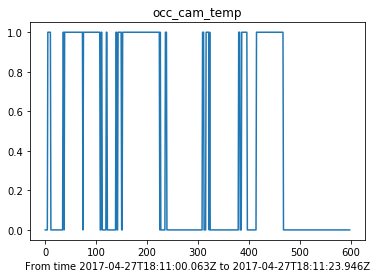

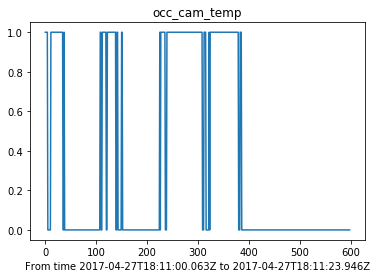

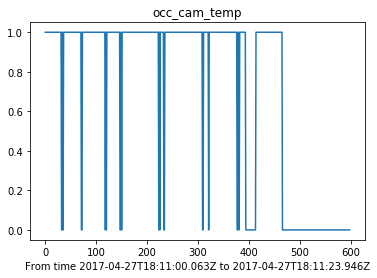

In [8]:
occ_cam = occ_cam_single_person_tss + occ_cam_multy_people_tss
occ_cam_single_person_tss[1:600].plotY()
occ_cam_multy_people_tss[1:600].plotY()
occ_cam[1:600].plotY()

### Filter out more than one people case using occ cam data

In [9]:
singlePerson_time_interval = sd.createSinglePersonTimeInterval_OccCamMsk_MeaningfulMsk\
                                                (strain_tss, \
                                                 occ_cam_multy_people_tss.convert2TimeIntervalLst(),  \
                                                 meaningful_time_interval_lst)

### Apply that time interval on strain gauge data 

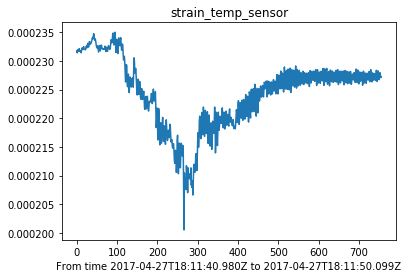

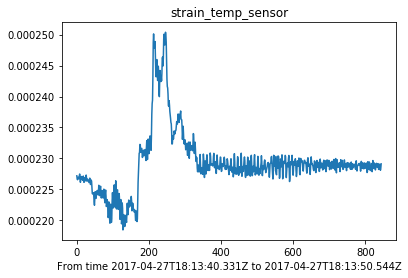

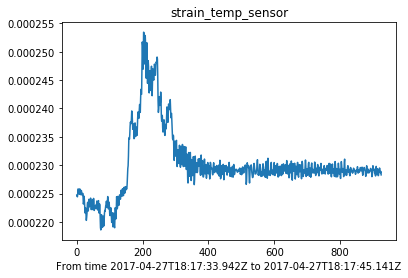

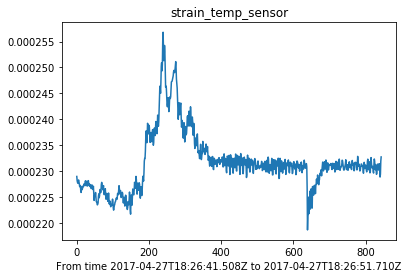

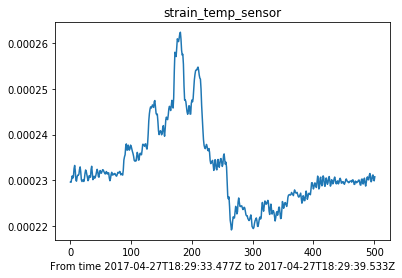

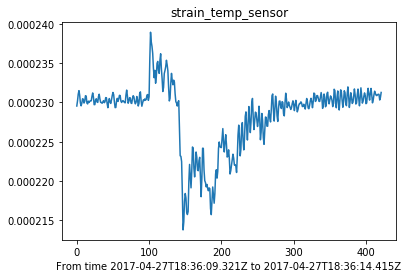

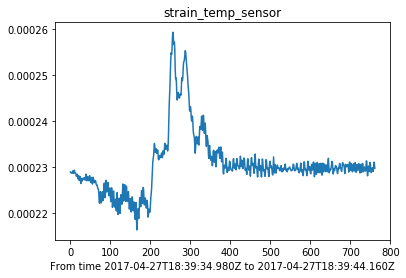

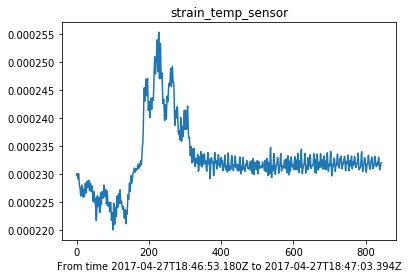

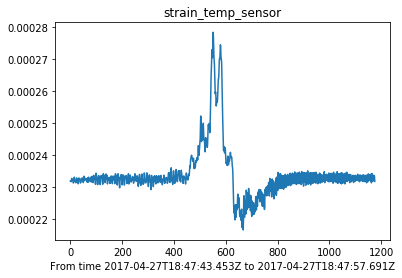

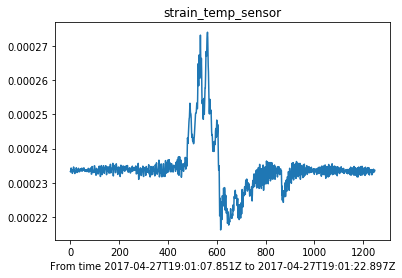

In [10]:

strain_tss.addMaskByTimeIntervalLst(singlePerson_time_interval,'single_person_mask')
strain_tss_lst = strain_tss.applyMaskByName('single_person_mask')
for i in range(10):
    strain_tss_lst[i].plotY()

### Apply that time interval on accel data 

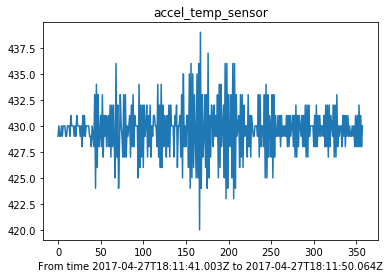

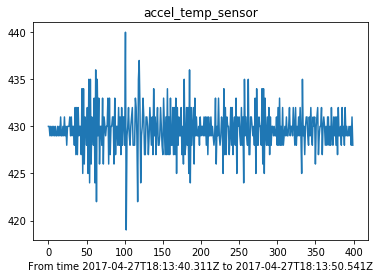

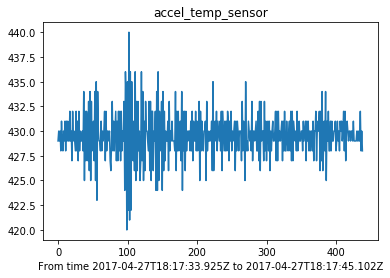

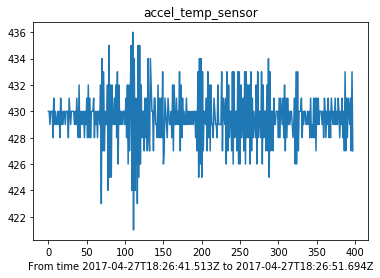

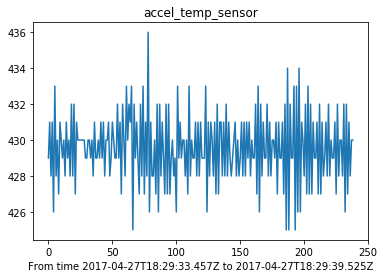

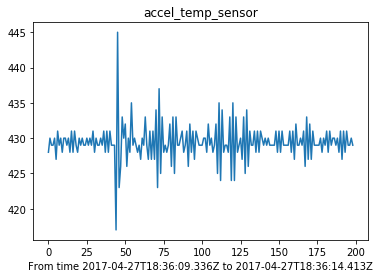

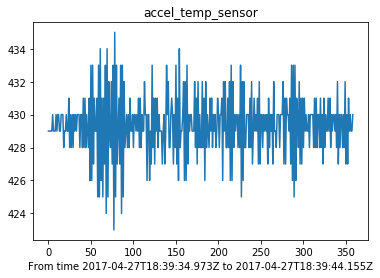

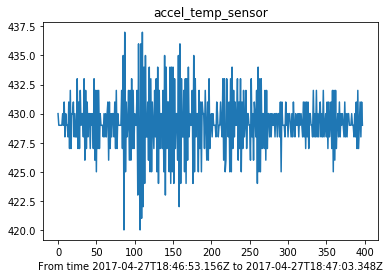

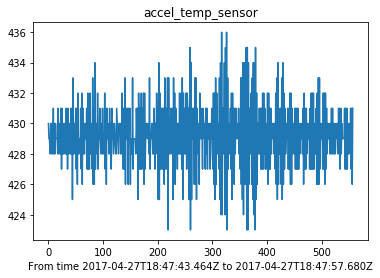

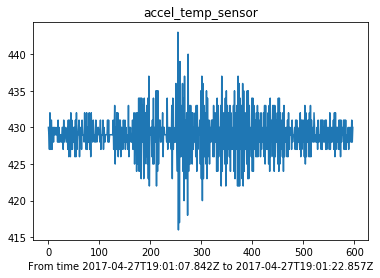

In [11]:
accel_tss.addMaskByTimeIntervalLst(singlePerson_time_interval,'single_person_mask')
accel_tss_lst = accel_tss.applyMaskByName('single_person_mask')
for i in range(10):
    accel_tss_lst[i].plotY()